In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/Colab_Notebooks/AdvancedDeepLearningCourse/Session03/DataAugmentation')

## Image Augmentation With ImageDataGenerator

In [5]:
import numpy as np
import matplotlib.pyplot as plt


from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

Using TensorFlow backend.


### Horizontal and Vertical Shift Augmentation

A shift to an image means moving all pixels of the image in one direction, such as horizontally or vertically, while keeping the image dimensions the same.

This means that some of the pixels will be clipped off the image and there will be a region of the image where new pixel values will have to be specified.

The width_shift_range and height_shift_range arguments to the ImageDataGenerator constructor control the amount of horizontal and vertical shift respectively.

These arguments can specify a floating point value that indicates the percentage (between 0 and 1) of the width or height of the image to shift. Alternately, a number of pixels can be specified to shift the image.

Specifically, a value in the range between no shift and the percentage or pixel value will be sampled for each image and the shift performed, e.g. [0, value]. Alternately, you can specify a tuple or array of the min and max range from which the shift will be sampled; for example: [-100, 100] or [-0.5, 0.5].

The example below demonstrates a horizontal shift with the width_shift_range argument between [-200,200] pixels and generates a plot of generated images to demonstrate the effect.

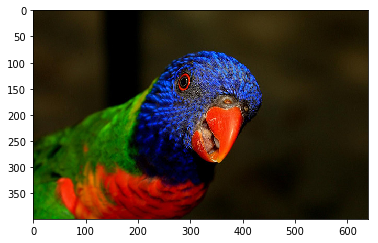

In [6]:
# load the image
img = load_img('bird.jpg')
plt.imshow(img);

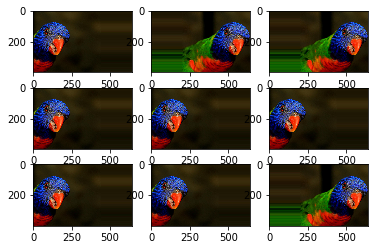

In [0]:
# convert to numpy array
data = img_to_array(img)

# expand dimention to one sample
# samples = np.reshape(data, (1, *data.shape))
samples = np.expand_dims(data,  axis=0)

# create image data augmentation generator
data_generator = ImageDataGenerator(width_shift_range=[-200, 200],
                                    fill_mode='nearest')

it = data_generator.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
    # define subplot
    plt.subplot(3, 3, i +1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot row pixel data
    plt.imshow(image)
# show the figure
plt.show()

Running the example creates the instance of ImageDataGenerator configured for image augmentation, then creates the iterator. The iterator is then called nine times in a loop and each augmented image is plotted.

We can see in the plot of the result that a range of different randomly selected positive and negative horizontal shifts was performed and the pixel values at the edge of the image are duplicated to fill in the empty part of the image created by the shift.

Below is the same example updated to perform vertical shifts of the image via the height_shift_range argument, in this case specifying the percentage of the image to shift as 0.5 the height of the image

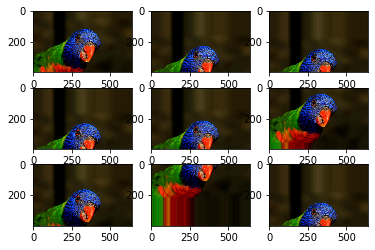

In [0]:
# create image data augmentation generator
data_generator = ImageDataGenerator(height_shift_range=0.5)

it = data_generator.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
    # define subplot
    plt.subplot(3, 3, i +1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot row pixel data
    plt.imshow(image)
# show the figure
plt.show()

Running the example creates a plot of images augmented with random positive and negative vertical shifts.

We can see that both horizontal and vertical positive and negative shifts probably make sense for the chosen photograph, but in some cases, the replicated pixels at the edge of the image may not make sense to a model.

Note that other fill modes can be specified via “fill_mode” argument.

### Horizontal and Vertical Flip Augmentation

An image flip means reversing the rows or columns of pixels in the case of a vertical or horizontal flip respectively.

The flip augmentation is specified by a boolean horizontal_flip or vertical_flip argument to the ImageDataGenerator class constructor. For photographs like the bird photograph used in this tutorial, horizontal flips may make sense, but vertical flips would not.

For other types of images, such as aerial photographs, cosmology photographs, and microscopic photographs, perhaps vertical flips make sense.

The example below demonstrates augmenting the chosen photograph with horizontal flips via the horizontal_flip argument.

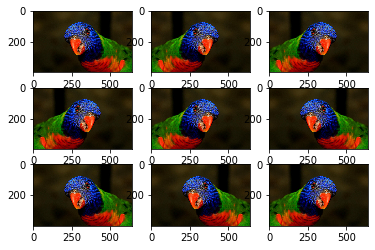

In [0]:
# create image data augmentation generator
data_generator = ImageDataGenerator(horizontal_flip=True)

it = data_generator.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
    # define subplot
    plt.subplot(3, 3, i +1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot row pixel data
    plt.imshow(image)
# show the figure
plt.show()

Running the example creates a plot of nine augmented images.

We can see that the horizontal flip is applied randomly to some images and not others.

### Random Rotation Augmentation

A rotation augmentation randomly rotates the image clockwise by a given number of degrees from 0 to 360.

The rotation will likely rotate pixels out of the image frame and leave areas of the frame with no pixel data that must be filled in.

The example below demonstrates random rotations via the rotation_range argument, with rotations to the image between 0 and 90 degrees.

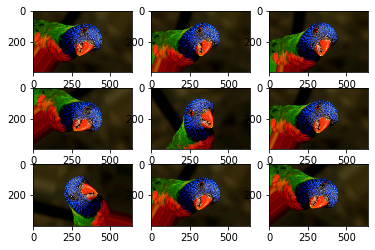

In [0]:
# create image data augmentation generator
data_generator = ImageDataGenerator(rotation_range=90)
# the rotation angel is between zero and 90 degrees

it = data_generator.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
    # define subplot
    plt.subplot(3, 3, i +1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot row pixel data
    plt.imshow(image)
# show the figure
plt.show()

Running the example generates examples of the rotated image, showing in some cases pixels rotated out of the frame and the nearest-neighbor fill.

### Random Brightness Augmentation

The brightness of the image can be augmented by either randomly darkening images, brightening images, or both.

The intent is to allow a model to generalize across images trained on different lighting levels.

This can be achieved by specifying the brightness_range argument to the ImageDataGenerator() constructor that specifies min and max range as a float representing a percentage for selecting a brightening amount.

Values less than 1.0 darken the image, e.g. [0.5, 1.0], whereas values larger than 1.0 brighten the image, e.g. [1.0, 1.5], where 1.0 has no effect on brightness.

The example below demonstrates a brightness image augmentation, allowing the generator to randomly darken the image between 1.0 (no change) and 0.2 or 20%.

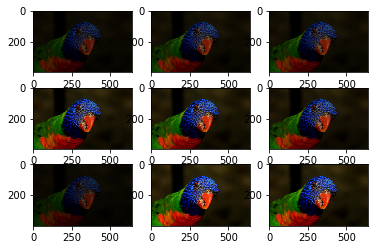

In [0]:
# create image data augmentation generator
data_generator = ImageDataGenerator(brightness_range=[0.2, 1.0])
# the rotation angel is between zero and 90 degrees

it = data_generator.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
    # define subplot
    plt.subplot(3, 3, i +1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot row pixel data
    plt.imshow(image)
# show the figure
plt.show()

Running the example shows the augmented images with varying amounts of darkening applied.

### Random Zoom Augmentation

A zoom augmentation randomly zooms the image in and either adds new pixel values around the image or interpolates pixel values respectively.

Image zooming can be configured by the zoom_range argument to the ImageDataGenerator constructor. You can specify the percentage of the zoom as a single float or a range as an array or tuple.

If a float is specified, then the range for the zoom will be [1-value, 1+value]. For example, if you specify 0.3, then the range will be [0.7, 1.3], or between 70% (zoom in) and 130% (zoom out).

The zoom amount is uniformly randomly sampled from the zoom region for each dimension (width, height) separately.

The zoom may not feel intuitive. Note that zoom values less than 1.0 will zoom the image in, e.g. [0.5,0.5] makes the object in the image 50% larger or closer, and values larger than 1.0 will zoom the image out by 50%, e.g. [1.5, 1.5] makes the object in the image smaller or further away. A zoom of [1.0,1.0] has no effect.

The example below demonstrates zooming the image in, e.g. making the object in the photograph larger.

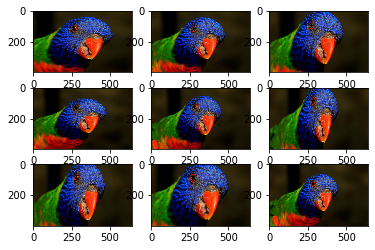

In [0]:
# create image data augmentation generator
data_generator = ImageDataGenerator(zoom_range=[0.5, 1.0])
# the rotation angel is between zero and 90 degrees

it = data_generator.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
    # define subplot
    plt.subplot(3, 3, i +1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot row pixel data
    plt.imshow(image)
# show the figure
plt.show()

Running the example generates examples of the zoomed image, showing a random zoom in that is different on both the width and height dimensions that also randomly changes the aspect ratio of the object in the image.

### Blog Address
https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

*:)*